# Priya More 
## Graduate Rotational Internship Program

# Task # 2 - To Explore Supervised Machine Learning

# Importing Libraries 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Data

In [5]:
Data=pd.read_csv("student_scores - student_scores.csv")
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing Data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

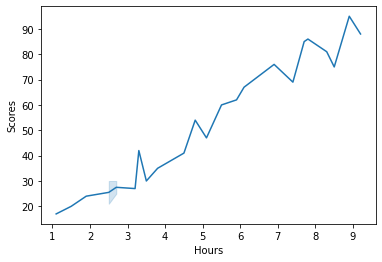

In [8]:
sns.lineplot(x="Hours",y="Scores",data=Data)

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

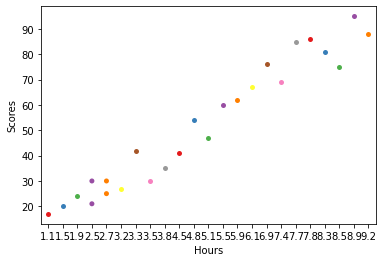

In [9]:
sns.swarmplot(x="Hours",y="Scores",data=Data,palette="Set1",split=True)

# Slicing

In [10]:
X=Data.iloc[:,:-1].values
y=Data.iloc[:,1].values

# Spliting data into training and testing set

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test = train_test_split(X , y, test_size=1/5 , random_state=0)

# Fitting simple linear regression to data 

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

# Predict the test set result 

In [13]:
y_pred=regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# Comparing Actual and Predicted Score

In [15]:
df=pd.DataFrame({"Actual":y_test , 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


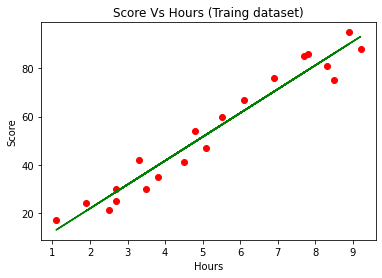

In [16]:
#visualising the training set
plt.scatter(X_train, y_train , color='red')
plt.plot(X_train , regressor.predict(X_train),color='green')
plt.title("Score Vs Hours (Traing dataset)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

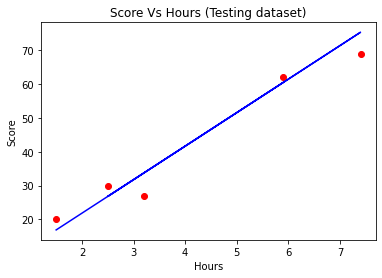

In [17]:
#visualising the training set
plt.scatter(X_test, y_test , color='red')
plt.plot(X_test , regressor.predict(X_test),color='blue')
plt.title("Score Vs Hours (Testing dataset)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

 It is a <b> Positive Linear Regression</b>,that menas more hours student will study he/she get more scores.

# What will be predicted score if a student study for 9.25 hrs in a day?


In [18]:
hours = [[9.25]]
pred_score = regressor.predict(hours)
print("No of Hours =",hours)
print("Predicted score ",pred_score[0])

No of Hours = [[9.25]]
Predicted score  93.69173248737538


In [19]:
import statsmodels.api as sm
x=sm.add_constant(X)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           9.13e-17
Time:                        22:40:19   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""